In [1]:
!pip install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt
import glob
import random
import os


In [3]:

!pip install ultralytics

In [4]:
!pip install gdown

Import and Extract Dataset (dataset)

In [5]:
!pip install gdown

import gdown
import zipfile
import os

file_id = '16ZFEeKedBsNlGDzwDci6UCA49Uhblsy-'
output_zip_path = '/content/DownloadedFile.zip'
extract_dir = '/teamspace/studios/this_studio/dataset'

os.makedirs(extract_dir, exist_ok=True)
print(f"Extraction directory created/verified: {extract_dir}")

url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, output_zip_path, quiet=False)

file_size = os.path.getsize(output_zip_path)
if file_size == 0:
    raise Exception("Downloaded file is empty.")
print(f"File downloaded successfully. Size: {file_size} bytes.")

try:
    with zipfile.ZipFile(output_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"ZIP file extracted successfully to: {extract_dir}")
except zipfile.BadZipFile as e:
    print(f"Error extracting ZIP file: {e}")

Extraction directory created/verified: /teamspace/studios/this_studio/dataset


Downloading...
From (original): https://drive.google.com/uc?id=16ZFEeKedBsNlGDzwDci6UCA49Uhblsy-
From (redirected): https://drive.google.com/uc?id=16ZFEeKedBsNlGDzwDci6UCA49Uhblsy-&confirm=t&uuid=1830d1b6-507b-4d9f-9395-8f1c70f44801
To: /content/DownloadedFile.zip
100%|██████████| 6.68G/6.68G [01:25<00:00, 77.7MB/s]


File downloaded successfully. Size: 6680700373 bytes.
ZIP file extracted successfully to: /teamspace/studios/this_studio/dataset


In [1]:
import os
import shutil
import pandas as pd

dataset_path = "/teamspace/studios/this_studio/dataset"
destination_path = "/teamspace/studios/this_studio/WarBirds"
csv_file = "/teamspace/studios/this_studio/labels_with_split.csv"

splits = ["train", "validation", "test"]
for split in splits:
    os.makedirs(os.path.join(destination_path, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(destination_path, split, "labels"), exist_ok=True)

df = pd.read_csv(csv_file)

class_names = df["class"].unique()
class_mapping = {name: idx for idx, name in enumerate(class_names)}

class_mapping_str = ", ".join([f"{idx}: {name}" for name, idx in class_mapping.items()])
print(f"Class ID Mapping: {class_mapping_str}")

missing_count = 0

for _, row in df.iterrows():
    image_name = row["filename"]
    img_width, img_height = row["width"], row["height"]
    class_id = class_mapping[row["class"]]
    bbox = [row["xmin"], row["ymin"], row["xmax"], row["ymax"]]
    split_type = row["split"].lower()
    
    x_center = ((bbox[0] + bbox[2]) / 2) / img_width
    y_center = ((bbox[1] + bbox[3]) / 2) / img_height
    width = (bbox[2] - bbox[0]) / img_width
    height = (bbox[3] - bbox[1]) / img_height
    
    label_txt = f"{class_id} {x_center} {y_center} {width} {height}\n"
    label_filename = os.path.splitext(image_name)[0] + ".txt"
    label_path = os.path.join(destination_path, split_type, "labels", label_filename)
    
    with open(label_path, "a") as f:
        f.write(label_txt)
    
    img_src_path = os.path.join(dataset_path, image_name)
    img_dest_path = os.path.join(destination_path, split_type, "images", image_name)
    
    if os.path.exists(img_src_path):
        shutil.copy2(img_src_path, img_dest_path)
    else:
        missing_count += 1

if missing_count > 0:
    print(f"Warning: {missing_count} images were not found in the dataset.")

print("Dataset conversion and organization complete.")

Class ID Mapping: 0: Mi28, 1: UH60, 2: F16, 3: H6, 4: F18, 5: F22, 6: F35, 7: JAS39, 8: B52, 9: JH7, 10: KF21, 11: US2, 12: Be200, 13: EF2000, 14: C2, 15: P3, 16: CL415, 17: E2, 18: Rafale, 19: Mig31, 20: Su25, 21: XB70, 22: YF23, 23: Su57, 24: F15, 25: KC135, 26: An72, 27: An22, 28: B2, 29: An124, 30: Tu160, 31: C5, 32: J20, 33: B1, 34: C130, 35: A10, 36: V22, 37: F117, 38: WZ7, 39: E7, 40: CH47, 41: AH64, 42: Mi24, 43: U2, 44: AG600, 45: KJ600, 46: RQ4, 47: Tu22M, 48: SR71, 49: J10, 50: Mirage2000, 51: AV8B, 52: Tu95, 53: A400M, 54: MQ9, 55: F14, 56: Su34, 57: F4, 58: Mi8, 59: Mig29, 60: JF17, 61: TB001, 62: KAAN, 63: Ka52, 64: C17, 65: An225, 66: Y20, 67: Su24, 68: C390, 69: TB2, 70: Ka27, 71: Tornado, 72: Vulcan, 73: Z19, 74: Mi26, 75: J35, 76: B21
Dataset conversion and organization complete.


In [2]:
import os
import shutil
import pandas as pd

dataset_path = "/teamspace/studios/this_studio/dataset"
destination_path = "/teamspace/studios/this_studio/WarBirds"
csv_file = "/teamspace/studios/this_studio/labels_with_split.csv"

splits = ["train", "validation", "test"]
for split in splits:
    os.makedirs(os.path.join(destination_path, split, "images"), exist_ok=True)

df = pd.read_csv(csv_file)

copied_count = 0
missing_count = 0

for _, row in df.iterrows():
    image_name = row["filename"]
    
    if not image_name.lower().endswith(".jpg"):
        image_name += ".jpg"
    image_name = image_name.lower()
    
    split_type = row["split"].lower()
    
    img_src_path = os.path.join(dataset_path, image_name)
    img_dest_path = os.path.join(destination_path, split_type, "images", image_name)
    
    if os.path.exists(img_src_path):
        shutil.copy2(img_src_path, img_dest_path)
        copied_count += 1
    else:
        missing_count += 1

print(f"Image copying complete. {copied_count} images copied successfully.")
if missing_count > 0:
    print(f"Warning: {missing_count} images were not found.")

Image copying complete. 33544 images copied successfully.


In [16]:

def yolo2bbox(bboxes):
    """
    Argument: bboxes
    The function takes bboxes as input containing the YOLO bounding box coordinates.
    It then calculates the (xmin, ymin) and (xmax, ymax) coordinates of the bounding box.
    Returns the coordinates: xmin, ymin, xmax, ymax
    """

    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [17]:

def plot_box(image, bboxes, labels):
    """
    Arguments:  image - an input image,
                bboxes - a list of bounding boxes in YOLO format,
                labels - a list of labels corresponding to each bounding box.
    The function plots the bounding boxes on the image using OpenCV (cv2).
    Returns the modified image.
    """

    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)

        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))

        cv2.rectangle(
            image,
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [21]:
def plot(image_paths, label_paths, num_samples):
    """
    Visualize a random selection of images along with their bounding boxes and labels.
    """
    all_images = []
    all_images.extend(glob.glob(image_paths + '/*.jpg'))
    all_images.extend(glob.glob(image_paths + '/*.JPG'))
    all_images.sort()
    num_images = len(all_images)
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0, num_images - 1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name + '.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label_parts = label_line.strip().split()
                if len(label_parts) < 5:
                    print(f"Skipping invalid label in {image_name}.txt: {label_line.strip()}")
                    continue
                label = label_parts[0]
                x_c, y_c, w, h = map(float, label_parts[1:])
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i + 1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

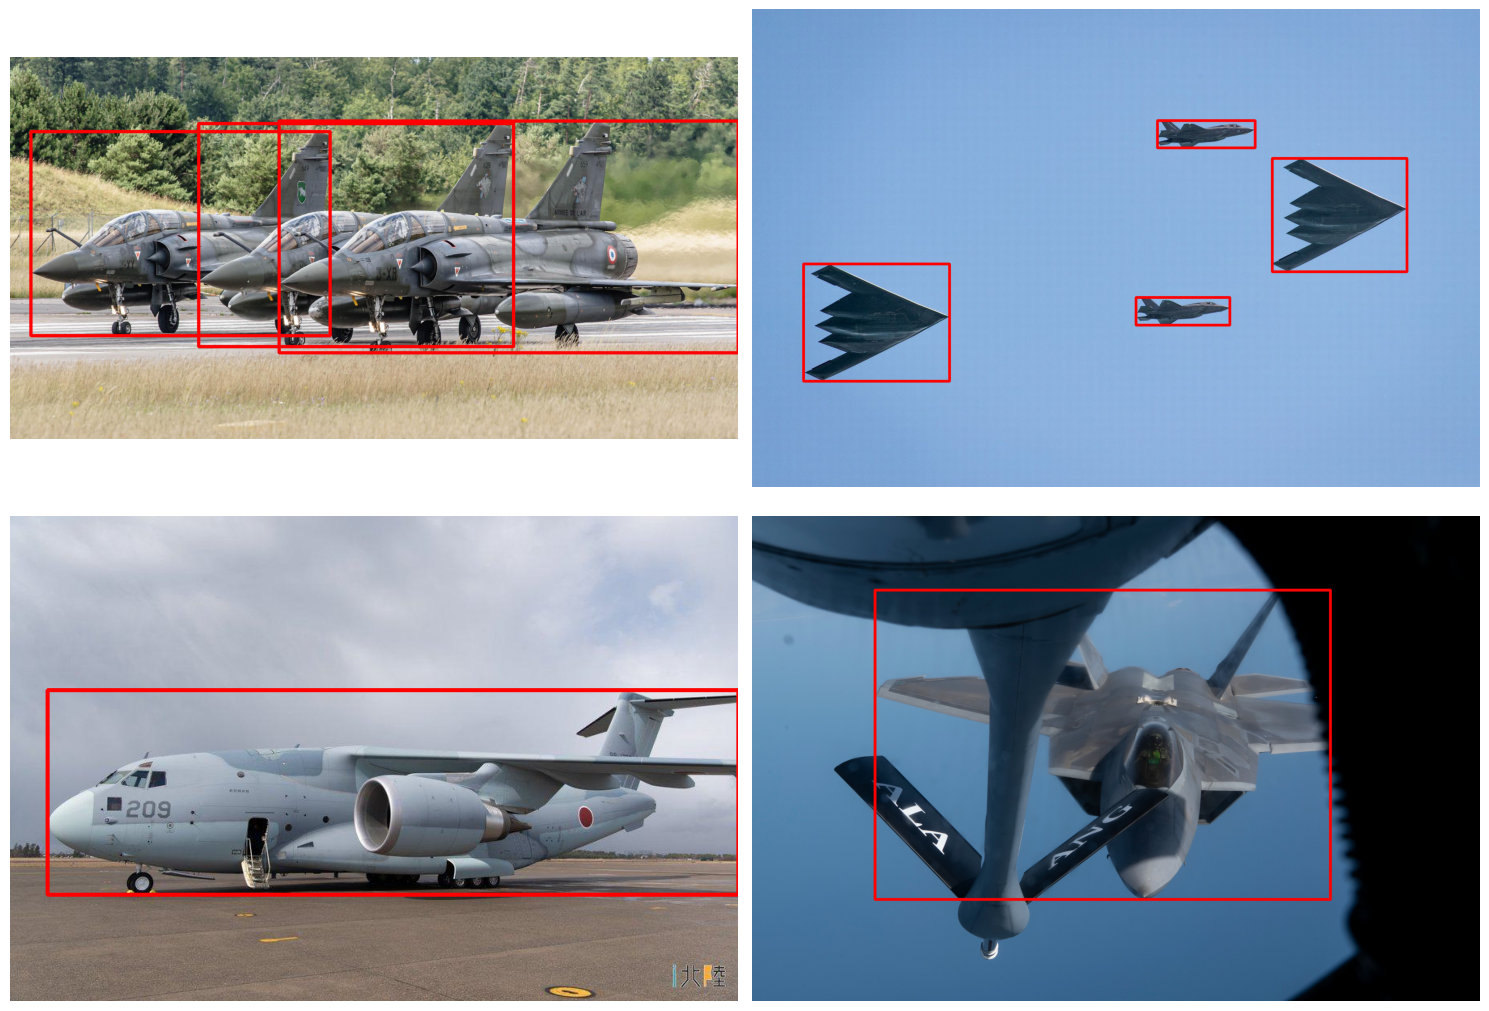

In [22]:

plot(
    image_paths='/teamspace/studios/this_studio/WarBirds/train/images',
    label_paths='/teamspace/studios/this_studio/WarBirds/train/labels',
    num_samples=4,
)

In [3]:
!yolo task=detect mode=train model=yolo11s.pt data=/teamspace/studios/this_studio/WarBirds/data.yaml epochs=50 imgsz=640 batch=16 optimizer='auto' plots=True

100%|███████████████████████████████████████| 18.4M/18.4M [00:00<00:00, 192MB/s]
Ultralytics 8.3.74 🚀 Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/teamspace/studios/this_studio/WarBirds/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

In [1]:
from ultralytics import YOLO
from PIL import Image
import torch
import cv2
import os

model_path = "/teamspace/studios/this_studio/runs/detect/train/weights/best.pt"
model = YOLO(model_path)

input_path = "/teamspace/studios/this_studio/input.mp4"

if input_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
    image = Image.open(input_path)
    results = model(image)

    for result in results:
        boxes = result.boxes
        class_ids = boxes.cls.cpu().numpy()
        confidences = boxes.conf.cpu().numpy()
        class_names = [model.names[int(cls_id)] for cls_id in class_ids]

        print("Detected Objects:")
        for i, (cls_name, conf) in enumerate(zip(class_names, confidences)):
            print(f"{i + 1}. Class: {cls_name}, Confidence: {conf:.2f}")

        result.show()
        result.save(filename="output_image.jpg")

elif input_path.lower().endswith(('.mp4', '.avi', '.mov', '.mkv')):
    video = cv2.VideoCapture(input_path)
    output_path = "output_video.avi"
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    fps = int(video.get(cv2.CAP_PROP_FPS))
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while video.isOpened():
        ret, frame = video.read()
        if not ret:
            break

        results = model(frame)

        for result in results:
            boxes = result.boxes
            class_ids = boxes.cls.cpu().numpy()
            confidences = boxes.conf.cpu().numpy()
            class_names = [model.names[int(cls_id)] for cls_id in class_ids]

            print("Detected Objects in Frame:")
            for i, (cls_name, conf) in enumerate(zip(class_names, confidences)):
                print(f"{i + 1}. Class: {cls_name}, Confidence: {conf:.2f}")

            annotated_frame = result.plot()
            out.write(annotated_frame)

    video.release()
    out.release()
    print(f"Processed video saved to {output_path}")
else:
    print("Unsupported file type. Please provide an image or video file.")
